# Data Mess Around 
For Taipei Real Estate Data

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm

In [4]:
data = pd.read_csv("taipei_train.csv")
data.head()

,district,total_ntd,land_area,main_building_material,building_area,num_room,num_hall,num_toilet,transaction_year,transaction_month,building_age
0,Xinyi District,79800000,527.00,Reinforced concrete construction,476.97,10,3,4,2019,9,1944.0
1,Wenshan District,15600000,46.77,Reinforced concrete construction,128.58,10,0,10,2019,10,1947.0
2,Neihu District,19000000,37.84,Reinforced concrete construction,148.65,9,0,9,2019,11,1949.0
3,Zhongshan Area,11500000,22.40,Reinforced concrete construction,75.96,7,0,7,2019,9,1951.0
4,Zhongshan Area,13980000,24.00,Reinforced concrete construction,73.75,7,2,3,2019,11,1951.0


<AxesSubplot:>

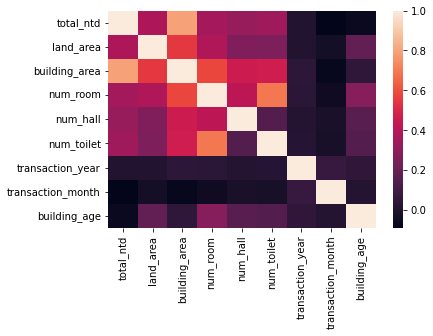

In [6]:
data.corr()
sns.heatmap(data.corr())

In [12]:
dep = data[['total_ntd']]
ind = data[['land_area','building_area','num_room','num_hall','num_toilet','building_age']]
ind2 = pd.get_dummies(data, columns=['district','main_building_material']).drop(['total_ntd'],axis = 1)
ind2.head()


,land_area,building_area,num_room,num_hall,num_toilet,transaction_year,transaction_month,building_age,district_Beitou,district_Daan District,...,district_shihlin,main_building_material_Brickwork,main_building_material_Reinforced concrete construction,main_building_material_See license,main_building_material_See other registration items,main_building_material_Steel reinforced concrete construction,main_building_material_Stone building,main_building_material_Strengthen brickwork,main_building_material_Wall type reinforced concrete construction,main_building_material_Wooden
0,527.00,476.97,10,3,4,2019,9,1944.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,46.77,128.58,10,0,10,2019,10,1947.0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,37.84,148.65,9,0,9,2019,11,1949.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,22.40,75.96,7,0,7,2019,9,1951.0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,24.00,73.75,7,2,3,2019,11,1951.0,0,0,...,0,0,1,0,0,0,0,0,0,0


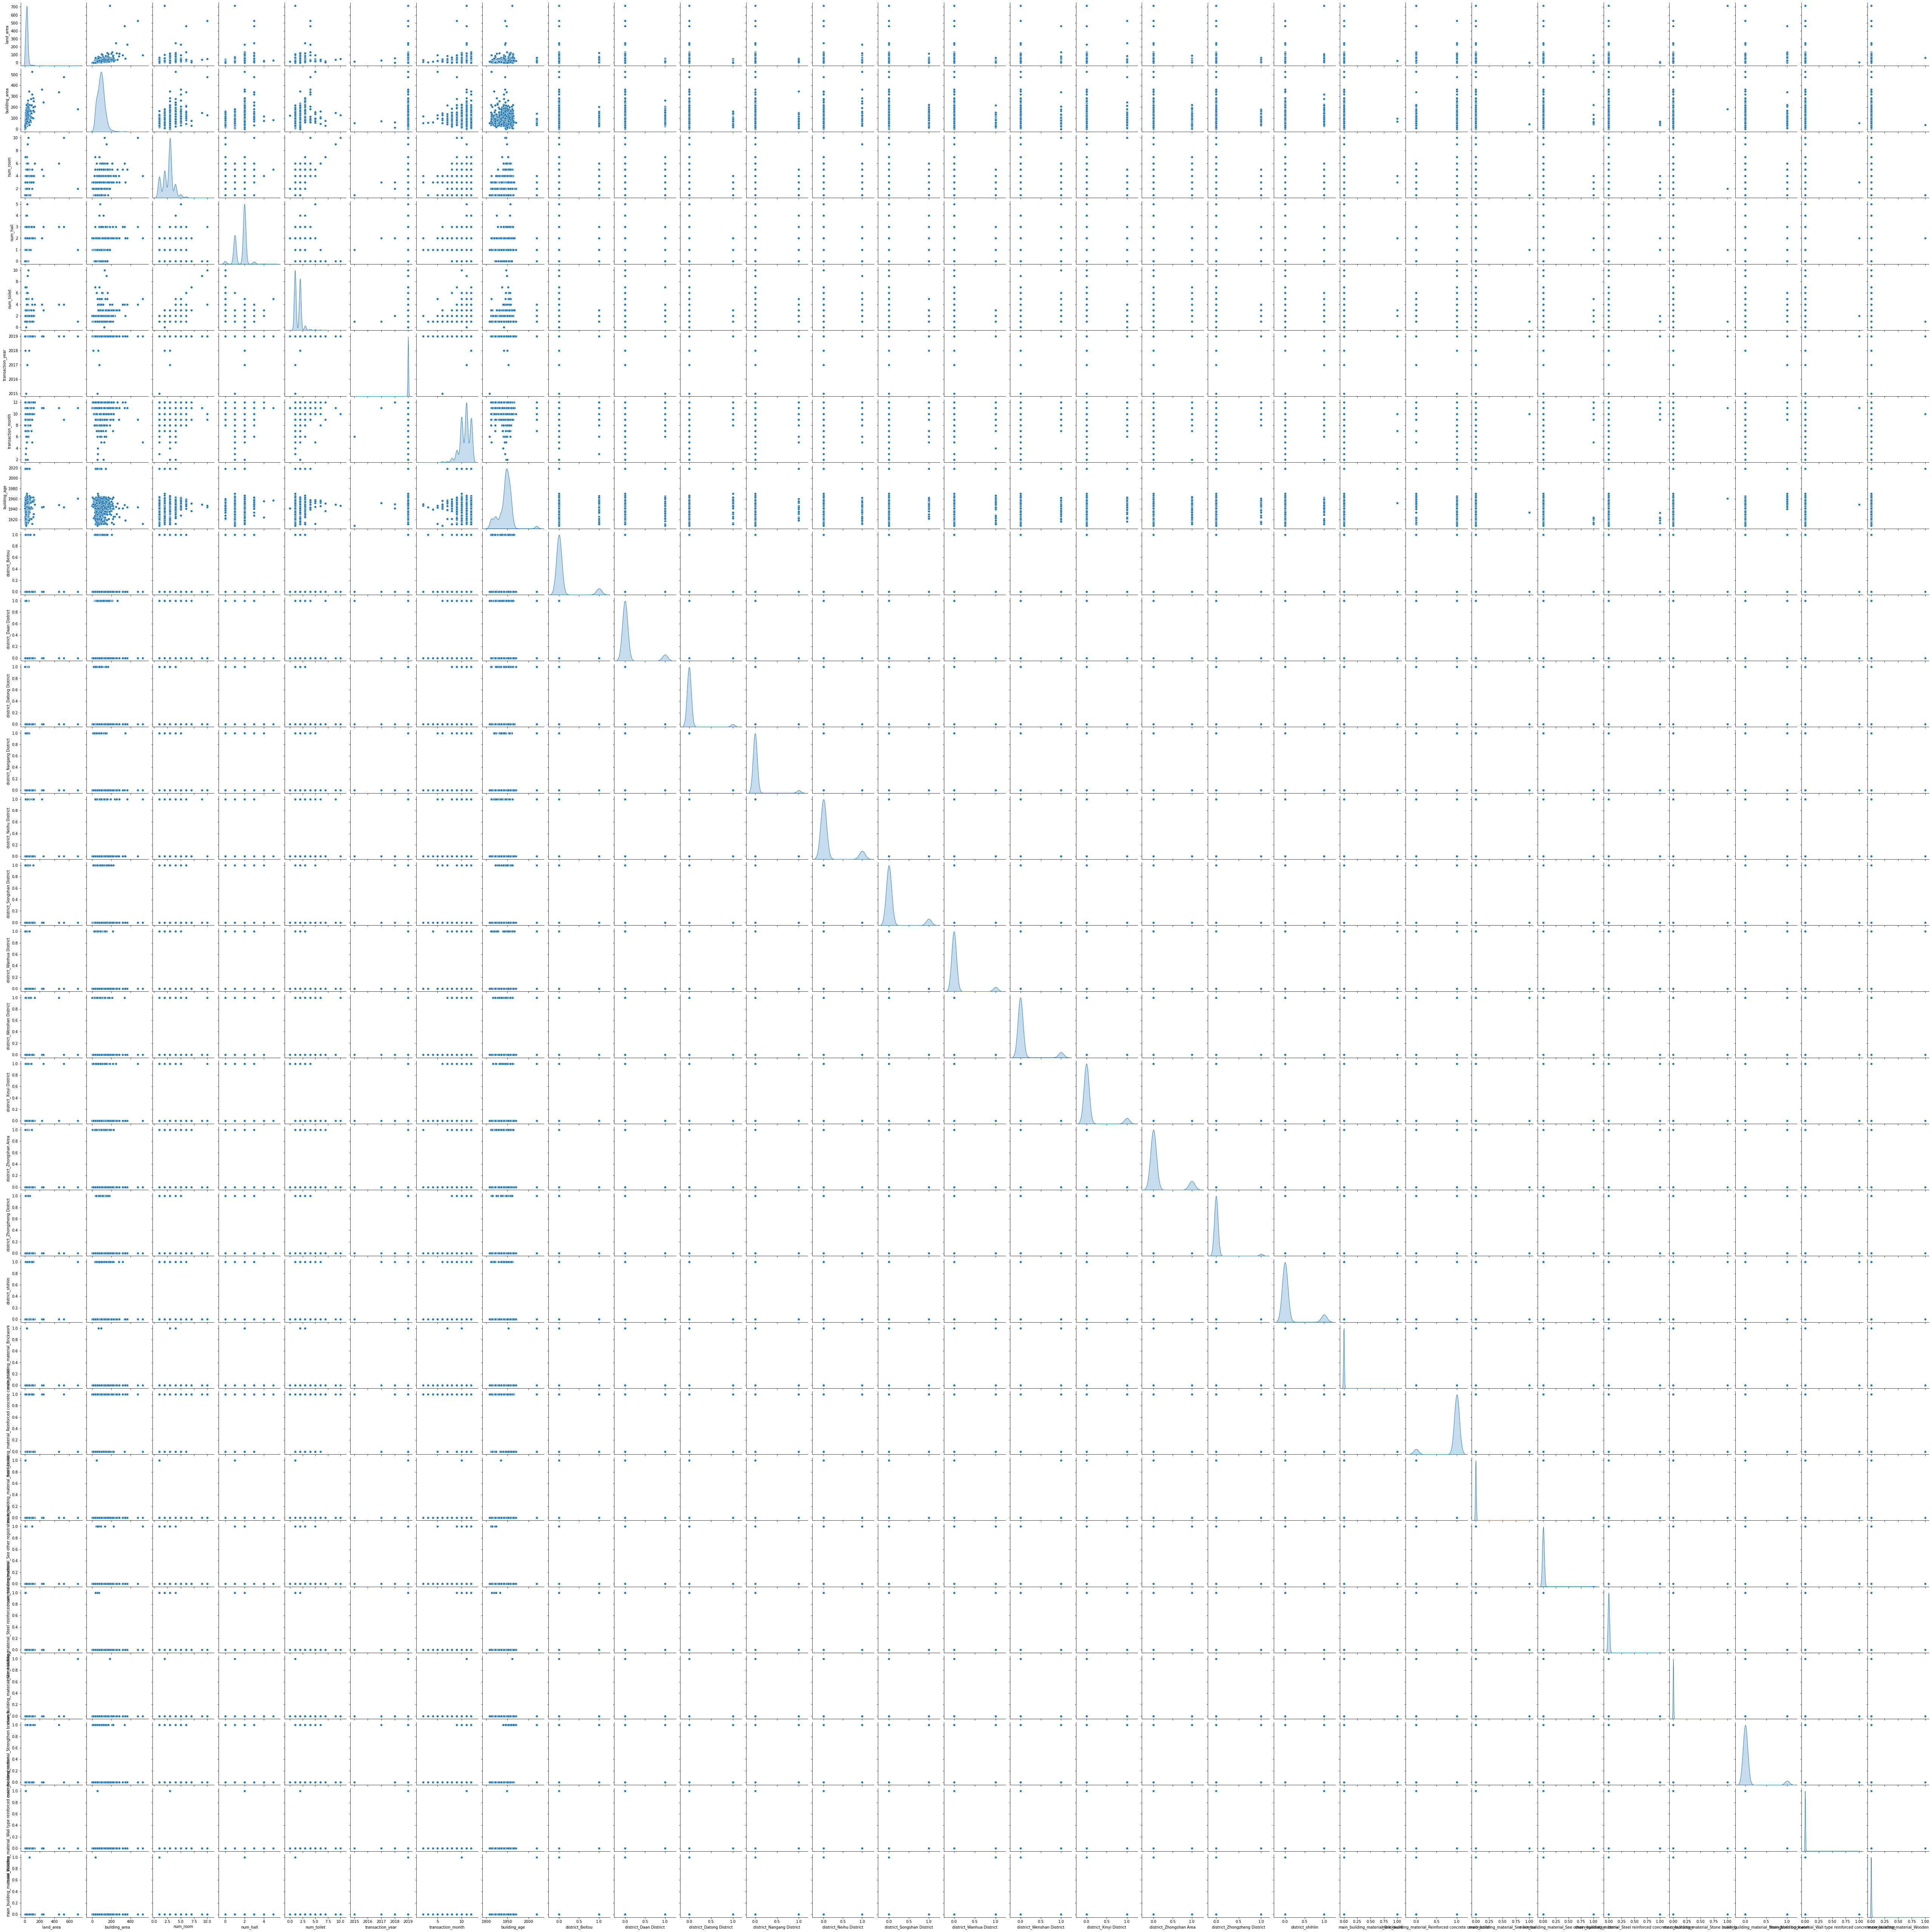

In [21]:
sns.pairplot(data = ind2, diag_kind = 'kde')

In [19]:
X_train, X_test,y_train,y_test = train_test_split(ind2,dep,test_size=0.2,random_state=0)

In [20]:
ml = LinearRegression()
clf_ml = ml.fit(X_train,y_train)
clf_ml.score(X_test,y_test)

0.6984036920807257